By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/03/22

Videos:
* [[10分鐘搞懂機器學習] 4.8 Python實作 接收者操作特徵曲線 ROC AUC](https://youtu.be/o5o_kcFLFzg)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


將眾多手寫數字圖片分為兩類，一類為數字為x (1,陽性)，另一類為數字不是x (0,陰性)


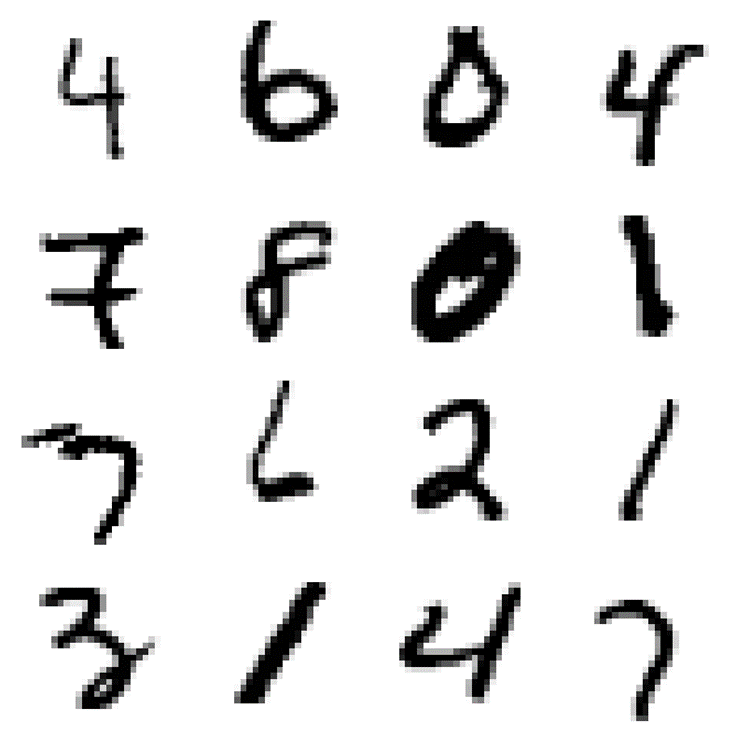

In [ ]:
# 首次程式撰寫，可在ChatGPT使用提示詞:使用Scikit-Learn載入MNIST資料，將20%的資料作為測試，80%作為訓練
# 加載範例中的變數
from google.colab import drive
import pickle

# 连接到Google Drive
drive.mount('/content/drive')

# 加载变量
with open('/content/drive/My Drive/ML/variables2_2.pkl', 'rb') as f:
    variables = pickle.load(f)

from sklearn.model_selection import train_test_split
# 从变量字典中获取特定变量
X = variables['X']
y = variables['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_binary=(y_train==2)


# 建立 SGD 分類器
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss='log_loss', alpha=0.001, max_iter=1000, random_state=42)

# 訓練 SGD 分類器
sgd_classifier.fit(X_train, y_binary)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


SGDClassifier(alpha=0.001, loss='log_loss', random_state=42)

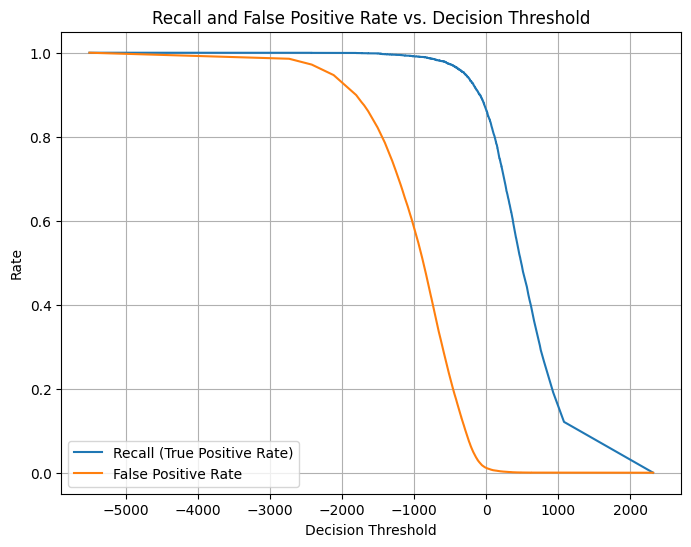

In [ ]:
# prompt:  y_binary實際標籤，X_train 訓練集，已訓練好的分類模型是sgd_classifier，利用decision score，畫 Recall and False Positive Rate versus decision threshold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming sgd_classifier is your trained classifier
decision_scores = sgd_classifier.decision_function(X_train)

# 計算不同閾值下的真陽性率（召回率）和假陽性率
fpr, tpr, thresholds = roc_curve(y_binary, decision_scores)

# 繪製 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='Recall (True Positive Rate)')
plt.plot(thresholds, fpr, label='False Positive Rate')
plt.xlabel('Decision Threshold')
plt.ylabel('Rate')
plt.title('Recall and False Positive Rate vs. Decision Threshold')
plt.legend()
plt.grid(True)
plt.show()




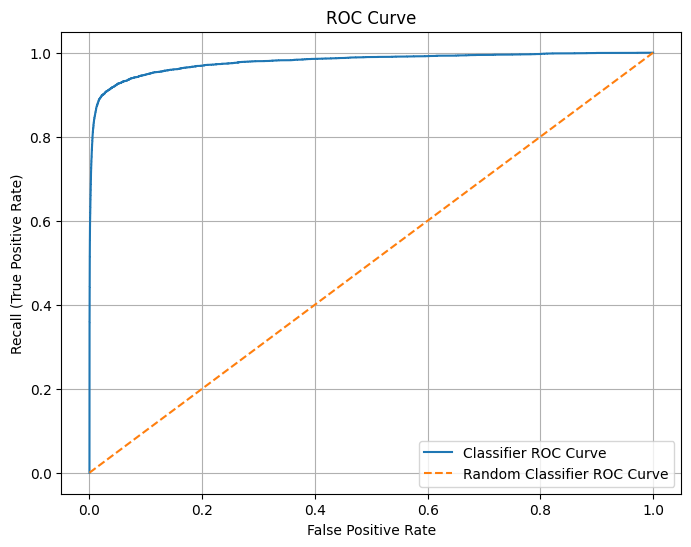

In [ ]:
# 畫 Recall and False Positive Rate  和 隨機分類器的ROC 在同一張圖上
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# sgd_classifier 是已经训练好的分类器
decision_scores = sgd_classifier.decision_function(X_train)

# 计算分类器的 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_binary, decision_scores)

# 计算随机分类器的 ROC 曲线
random_fpr = np.linspace(0, 1, 100)
random_tpr = np.linspace(0, 1, 100)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Classifier ROC Curve')
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random Classifier ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall (True Positive Rate)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


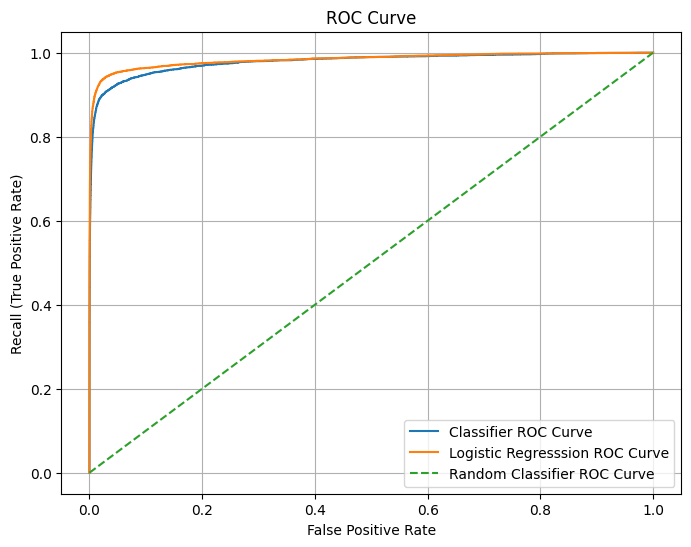

In [ ]:
# 產生Logistic regression二元分類器，給定訓練樣本 X_train 計算decision scores

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression


# sgd_classifier 是已经训练好的分类器
decision_scores = sgd_classifier.decision_function(X_train)

# 计算分类器的 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_binary, decision_scores)


# 创建 Logistic 回归分类器
logistic_classifier = LogisticRegression()

# 使用训练样本 X_train 进行训练
logistic_classifier.fit(X_train, y_binary)

# 计算决策分数
decision_scores_logistic = logistic_classifier.decision_function(X_train)

# 计算分类器的 ROC 曲线
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_binary, decision_scores_logistic)



# 计算随机分类器的 ROC 曲线
random_fpr = np.linspace(0, 1, 100)
random_tpr = np.linspace(0, 1, 100)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Classifier ROC Curve')
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regresssion ROC Curve')
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random Classifier ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall (True Positive Rate)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()





